In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
</style>
"""))

**<font size="6" color="red">ch2. 한글 형태소 분석</font>**

# 1. 자연어 처리

- 자연어(사람들이 일상적으로 사용하는 언어) 처리
- 자연어 처리 하는 분야
    - 자연어 이해 : 형태소분석 -> 의미분석 -> 대화분석
    - 자연어 생성 : 대화분석 -> 다음 문장이나 단어 출력
- 활용분야 : 맞춤법검사, 번역기, 검색엔진, 키워드 분석

# 2. 자연어 처리 절차
- 전처리 : 단어, 어절 추출
- 분석 후보 생성 : 형태소 분리, 원형복원, 품사 태깅
- 제약조건(불용어 처리) 규칙 확인
- 분석

# 3. 한글 형태소 분석 엔진
- KoNLPy : 파이썬용 자연어 처리기 (JPype1 패키지를 의존)
    https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
    - KOMORAN : 자바로 만든 형태소 분석기 (JAVA_HOME 시스템변수)
    - HanNanum : 자바로 만든 형태소 분석기 (JAVA_HOME 시스템변수)
    - Kkma : 서울대학교 연구실
- KoNLP : R용 자연어 처리기

In [1]:
#! pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl
# KoNLPy 패키지 install

Processing c:\big\src\09_자연어처리\jpype1-1.2.0-cp38-cp38-win_amd64.whl
JPype1 is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [5]:
text = """아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번째로 
많이 사용되는 언어입니다"""

## 3.1 HanNanum

In [2]:
from konlpy.tag import Hannanum
han = Hannanum()
han.analyze(text)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]]]

https://konlpy.org 
<pre>
    api -> 그 위에 Comparison between POS tagging classes 클릭 
    -> Korean POS tags comparison chart 클릭 후 다른 이름으로 저장
    

In [4]:
# 형태소 분석만
print(han.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전세계', '에서', '13번', '째', '로', '많', '이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [6]:
# 품사 태깅
print(han.pos(text, ntags=9)) # 디폴트가 ntags=9

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E')]


In [7]:
print(han.pos(text, ntags=22)) 

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡', 'NC'), ('하', 'XS'), ('기', 'ET'), ('도', 'JX'), ('하', 'PV'), ('ㄴ', 'ET'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'XS'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF')]


In [8]:
# 퀴즈 : text 중에 형용사(PA)만 추출
tagged_text = han.pos(text, ntags=22)
l = []
for t in tagged_text:
    if t[1] == 'PA':
        l.append(t[0])
l

['아름답', '많']

In [9]:
[t[0] for t in tagged_text if t[1]=='PA']

['아름답', '많']

In [10]:
# 명사만 추출
han.nouns(text)

['복잡', '한국어', '전세계', '13번', '사용', '언어']

## 3.2 Kkma

In [6]:
from konlpy.tag import Kkma
kkma = Kkma(max_heap_size=1024) # 힙메모리 사이즈 늘릴 때 사용
print(kkma.morphs(text)) # 형태소 분석만

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [8]:
print(kkma.pos(text, 56)) # ntags기본값은 30

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN')]


In [18]:
# 보통명사만 추출
tagged_text = kkma.pos(text, 56)
[t[0] for t in tagged_text if t[1]=='NNG']

['복잡', '한국어', '전세계', '사용', '언어']

In [19]:
# 명사들 다 추출
kkma.nouns(text)

['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']

## 3.3 Komoran

In [9]:
from konlpy.tag import Komoran
komoran = Komoran(max_heap_size=2048) # heap memory 
print(komoran.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [10]:
print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


In [11]:
print(komoran.pos(text))

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EC')]


In [14]:
# 일반명사(NNG)만 추출
tagged_text = komoran.pos(text)
[t[0] for t in tagged_text if t[1]=='NNG']

['전', '세계', '사용', '언어']

In [15]:
print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


# 4. 말뭉치

In [17]:
print(r'Hello\nWorld') # r:raw data
print('Hello\nWorld')

Hello\nWorld
Hello
World


In [28]:
from konlpy.corpus import kolaw
data = kolaw.open('constitution.txt').read()
print(len(data))
print(data[:20])

18884
대한민국헌법

유구한 역사와 전통에 


In [27]:
from konlpy.corpus import kobill
data1 = kobill.open('1809892.txt').read()[:1000]
data1

'교육공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9892\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  현행 교육공무원의 육아휴직은 만 6세 이하의 초등학교 취학 전 자\n\n녀의 육아를 위한 경우로 한정되어 있어 초등학교 취학 후 등하교 및 \n\n방과 후 양육 등에 어려움이 많고, 저학년 자녀 혼자 등하교를 하거나 \n\n어른 없는 집에서 지내다가 성폭력 범죄 등 흉악범죄의 피해자가 되\n\n고 있음. \n\n  이에 육아휴직 가능 시기를 만 8세 이하의 자녀로 확대하여 자녀가 \n\n초등학교에 입학하여 학교생활에 순조롭게 적응할 수 있는 나이까지 \n\n교육공무원이 자녀양육을 위해서 휴직할 수 있도록 하려는 것임(안 제\n\n44조제1항제7호). \n\n- 1 -\n\n\x0c법률  제        호\n\n교육공무원법 일부개정법률안\n\n교육공무원법 일부를 다음과 같이 개정한다.\n\n제44조제1항제7호 중 “자녀(만 6세 이하의 초등학교 취학 전 자녀)”를 \n\n“만 8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자\n\n녀”로 한다.\n\n제45조제1항제6호 중 “1년 이내로 한다. 다만, 여자 교육공무원의 경\n\n우 任用權者는 2年의 범위내에서 그 休職期間을 연장할 수 있다.”를 \n\n“1년 이내(여자 교육공무원 3년 이내)로 하되, 분할하여 휴직할 수 있\n\n다.”로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n第44條(休職) ① 敎育公務員이 다\n\n第44條(休職) ① ---------------\n\n음 각 호의 어느 하나에 해당\n\n----------------------------\n\n하

# 5. 워드 클라우드

In [29]:
type(data)

str

In [34]:
i = 20
print("i={:d}".format(i))
print("i=%d" % (i))

i=20
i=20


In [63]:
# 명사들 추출
word_list = komoran.nouns("%r" % data)
print('명사 출현 수 : ',len(word_list) )
print('출현 명사 종류 수 :', len(set(word_list)) )
print('한 단어당 평균 반복 횟수 :', len(word_list) / len(set(word_list)) )
print(type(word_list))

명사 출현 수 :  3361
출현 명사 종류 수 : 891
한 단어당 평균 반복 횟수 : 3.772166105499439
<class 'list'>


In [64]:
print(word_list[:20])

['대한민국', '헌법', '유구', '한', '역사', '전통', '국민', '운동', '건립', '대한민국', '임시', '정부', '법통', '불의', '항거', '민주', '이념', '계승', '조국', '민주개혁']


In [65]:
text = ' '.join(word_list)
text[:200]

'대한민국 헌법 유구 한 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 민주 이념 계승 조국 민주개혁 평화 통일 사명 입각 정의 인도 동포애 민족 단결 사회 폐습 불의 타파 자율 조화 바탕 자유 민주 기본 질서 정치 경제 사회 문화 영역 각인 기회 능력 최고 도로 발휘 자유 권리 책임 의무 완수 안 국민 생활 균등 향상 밖 항구 세계 평화 인'

In [66]:
# 아나콘다 프롬프트에서 pip install WordCloud 한다

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

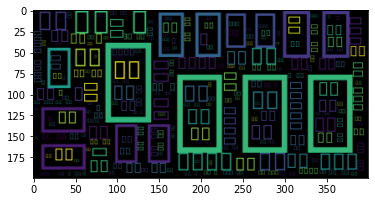

In [68]:
wordc = WordCloud(     )
wordc.generate(text)
plt.figure()
plt.imshow(wordc, interpolation='bilinear')

In [69]:
wordc = WordCloud(background_color='white',
                 max_words=300,
                 font_path="c:/Windows/fonts/malgun.ttf",
                 relative_scaling=0.2)
wordc.generate(text)

(-0.5, 399.5, 199.5, -0.5)

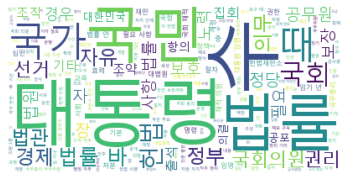

In [70]:
plt.figure()
plt.imshow(wordc, interpolation='bilinear')
plt.axis('off')

일반명사 출현 수 :  2316
출현한 일반명사 종류 수 : 661
한 단어당 평균 반복 횟수 : 3.503782148260212
<class 'list'>


(-0.5, 399.5, 199.5, -0.5)

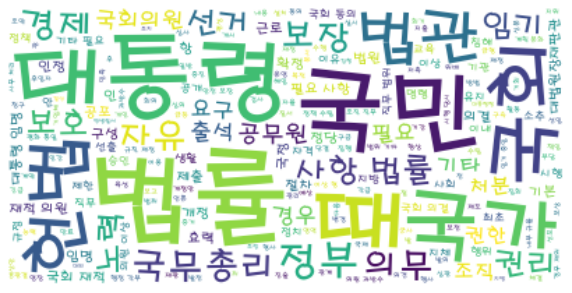

In [72]:
# 일반명만 추출
tagged_data = komoran.pos(data)
word_list = [t[0] for t in tagged_data if t[1]=='NNG']
print('일반명사 출현 수 : ',len(word_list) )
print('출현한 일반명사 종류 수 :', len(set(word_list)) )
print('한 단어당 평균 반복 횟수 :', len(word_list) / len(set(word_list)) )
print(type(word_list))
text = ' '.join(word_list)
# 워드 클라우드
wordc = WordCloud(background_color='white',
                 max_words=300,
                 font_path='c:/Windows/Fonts/H2PORM.TTF',
                 relative_scaling=0.2)
wordc.generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordc, interpolation='bilinear') # bilinear 보강법
plt.axis('off')

In [78]:
# 불용어 처리 (불용어 사전 + 불용어)
from wordcloud import STOPWORDS
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
불용어 = STOPWORDS | ENGLISH_STOP_WORDS | set(['대통령', '법관'])
불용어 = set(['대통령', '법관'])

(-0.5, 399.5, 199.5, -0.5)

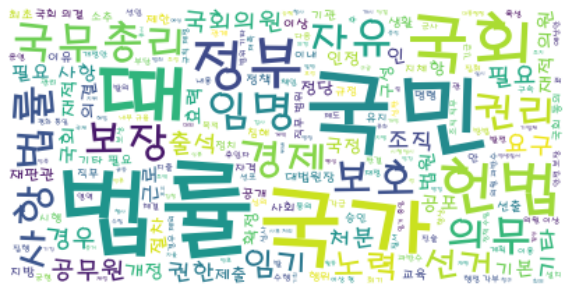

In [79]:
# 워드 클라우드
wordc = WordCloud(background_color='white',
                 max_words=300,
                 font_path='c:/Windows/Fonts/H2PORM.TTF',
                 relative_scaling=0.2,
                 stopwords=불용어)
wordc.generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordc, interpolation='bilinear') # bilinear 보강법
plt.axis('off')

In [80]:
import os
os.getcwd()

'C:\\big\\src\\09_자연어처리'

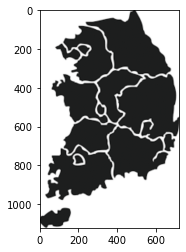

In [87]:
# 마스킹 : 워드 클라우드를 지정된 마스크 이미지에 맞도록 표시
from PIL import Image
import numpy as np
img = Image.open('south_korea.png').convert('RGBA')
# png파일 : 'RGBA'로   jpg파일: 'RGB'
mask = Image.new('RGB', img.size, (0,0,0))
mask.paste(img)
plt.imshow(mask)
mask = np.array(mask)

(-0.5, 719.5, 1123.5, -0.5)

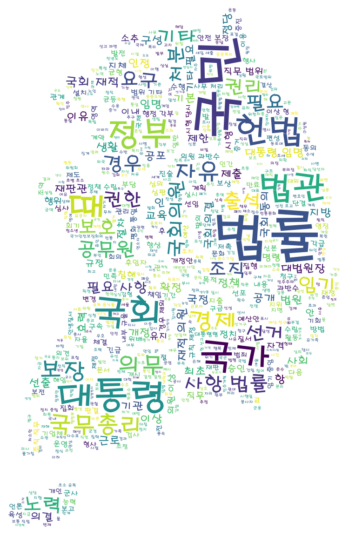

In [91]:
wordcloud = WordCloud(background_color='white',
                     max_words=700,
                     font_path='c:/Windows/Fonts/H2PORM.TTF',
                     relative_scaling=0.1,
                     mask=mask)
wordcloud.generate(text)
plt.figure(figsize=(6,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [92]:
wordcloud.to_file('south_korea_wordcloud.png')

(-0.5, 899.5, 899.5, -0.5)

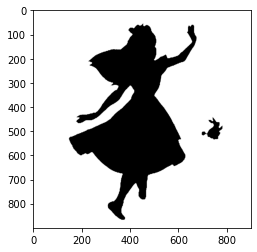

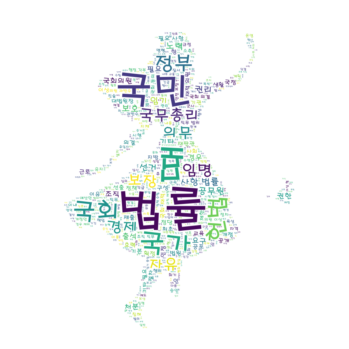

In [97]:
# 마스킹 : 워드 클라우드를 지정된 마스크 이미지에 맞도록 표시
from PIL import Image
import numpy as np
img = Image.open('test3.png').convert('RGBA')
# png파일 : 'RGBA'로   jpg파일: 'RGB'
mask = Image.new('RGB', img.size, (0,0,0))
mask.paste(img)
plt.imshow(mask)
mask = np.array(mask)
wordcloud = WordCloud(background_color='white',
                     max_words=700,
                     font_path='c:/Windows/Fonts/H2PORM.TTF',
                     relative_scaling=0.1,
                     mask=mask,
                     stopwords=불용어)
wordcloud.generate(text)
plt.figure(figsize=(6,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# 6. 단어 빈도수 계산

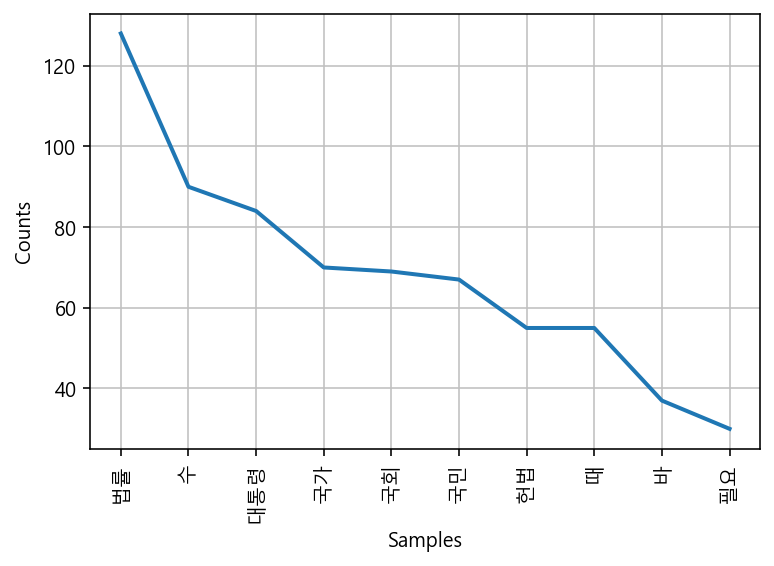

In [104]:
import nltk
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
plt.rc("font", family="Malgun Gothic")
word_list = komoran.nouns(data)
nltk.Text(word_list).plot(10)

# 7. 워드 임베딩
- 단어간 유사성 도출

In [1]:
# 뉴스 기사 link들 list 가져오기
import requests
from bs4 import BeautifulSoup
rss_url = "https://fs.jtbc.joins.com/RSS/economy.xml"
jtbc_economy = requests.get(rss_url)
economy_soup = BeautifulSoup(jtbc_economy.content, "xml")
link_list = economy_soup.select('item > link')
link_list = [link.text for link in link_list]
link_list

['https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997856',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997858',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997873',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997839',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997816',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997838',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997841',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997663',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997660',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997664',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997622',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997623',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997533',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB119

In [2]:
len(link_list)

20

In [3]:
# 뉴스 기사들 명사들만 뽑아 워드 임베딩하기 좋게 만들기
from konlpy.tag import Kkma
kkma = Kkma()
news = []

for link in link_list:
    news_response = requests.get(link)
    news_soup = BeautifulSoup(news_response.content, "html.parser")
    news_title = news_soup.select_one('h3#jtbcBody')
    news_content = news_soup.select_one('div#articlebody > div.article_content')
    content = str(news_title.text) + ' ' + str(news_content.text)
    print(content)
    news.append(kkma.nouns(content))

다주택 처분하라니 '용도변경'한 의원들…'꼼수 절세' 의혹 
[앵커]공직자들의 재산이 이번에 공개가 됐고요. 정부 여당이 집이 2채 이상이면 처분을 하라고 한 이후 집을 줄인 경우도 있었고 다주택자도 여전히 있었다는 소식 전해드렸는데요. 주택을 상가로 바꾼 국회의원도 여럿 있었습니다.김서연 기자가 보도합니다.[기자]서울 명일동의 한 다세대 주택입니다.민주당 최종윤 의원은 이곳 1층의 집을 얼마 전 '근린생활시설', 다시 말해 상가로 용도변경했습니다.이로써 최 의원은 전셋집만 있고 본인 소유의 집은 없는 무주택자가 됐습니다.하지만 현장에 가보니 상가로 바꾼 흔적은 보이지 않습니다.[A씨/인근 상점 주인 : 바로 옆에가 지금 아마 OOO호로 돼 있을 거예요. 지금 (사람) 안 살고 있고요. 3년 됐죠. 이사 오고 나서 들어오는 걸 본 적은 없어요.]올해 공직자 재산공개에선 약속이나 한 것처럼 주택을 상가로 용도변경한 국회의원이 여러 명 있습니다.같은 당의 유기홍 의원은 배우자 명의의 인천 강화군 단독주택을 근린생활시설로 바꾸면서 1주택자가 됐습니다.집이 3채였던 같은 당 임종성 의원도 이런 방식으로 1채를 줄였습니다.지난해 정부와 여당은 고위공직자에게 1가구 1주택을 보유하도록 권유했습니다.이후 주택을 상가로 바꾼 국회의원들이 늘어난 겁니다.물론 용도 변경을 한 의원이 여당만 있는 건 아닙니다.국민의힘 김미애 의원도 부산 단독주택을 근린생활시설로 바꾸고 아파트를 팔면서 무주택자가 됐습니다.건물 용도를 주택에서 근린생활시설로 바꿀 땐 간단한 신고 절차만 거치면 됩니다.다주택자가 용도변경을 하면 주택 수가 줄어들어 매년 내는 종합부동산세와 집을 팔 때 중과되는 양도세를 피할 수 있습니다.전문가들은 주택을 상가로 용도변경하는 건 '꼼수 절세'로 의심할 만하다고 지적합니다.[권대중/명지대 부동산학과 교수 : (건물의) 1/2 이하로 주택이 있을 때는 상가로 칩니다. 일반 주거지역에서 용도를 변경하는 건 신고로 끝나요. 변경은 불법이 아니더라도 약은 거지, 그건. 세금을 

[뉴스체크｜경제] "비트코인으로 테슬라 구매 가능" 
1. 오피스텔 분양 급감…서울 '반토막'오피스텔 물량이 올해 전국적으로 크게 줄어든다고 하는데요. 올해 들어서 전국에서 분양이 됐거나 예정인 물량이 2만5천여 실인데, 서울의 경우에는 5천여 실로 지난해에 비해 50% 넘게 줄었습니다. 아파트 시장에 대한 규제로 오피스텔 수요는 늘고 있어서 지난 1월과 2월 고가의 오피스텔 매매량은 역대 가장 많았습니다.2. 네이버 뉴스 등 서비스 한때 장애네이버 일부 서비스에서 접속 장애가 어제(24일) 오후에 있었습니다. 서비스 장에 메시지가 뜨고 접속 속도도 매우 느렸는데, 과학기술정보통신부에서는 디도스 공격 가능성에 무게를 두고 추가 확인을 하겠다는 입장입니다.3. "비트코인으로 테슬라 구매 가능"테슬라 최고경영자 머스크가 이제 비트코인으로 테슬라를 살 수 있다면서 미국 외의 지역에서는 올해 안에는 가능할 거라고 했는데요. 법정 화폐로 전환되지 않고 비트코인으로 남게 될 것이라고 했습니다. 비트코인 가격은 이후 급등세를 보였습니다.

'코로나 여파' 직원 월급 줄었는데…총수들은 '연봉 셀프 인상' 
[앵커]기업 총수들의 재산도 어제(24일) 공개됐습니다. 코로나19의 여파로 월급봉투가 얇아진 노동자가 적지 않은데, 총수들의 연봉은 10억 원 넘게 오른 경우도 있었습니다. 총수들의 '연봉 셀프 인상'에 제동을 걸 장치가 필요하다는 지적이 나왔습니다.김서연 기자입니다.[기자]조원태 한진그룹 회장은 지난해 총 31억 원가량의 연봉을 받았습니다.1년 전보다 12억 원 오른 겁니다.직원들의 반응은 차갑습니다.지난해 무급 휴직에 들어간 직원들이 많아 평균 연봉이 16%가량 줄었기 때문입니다.해외여행객이 줄어든 영향으로 매출도 전년 대비 38% 감소했습니다.[A씨/대한항공 승무원 : 저희는 코로나로 휴업 중이라 평소 월급의 반밖에 못 받는 것 같은데… 사실 생계도 많이 힘들고 이직도 고려하고 있는데, 총수는 고통을 분담하지 않는 것 같아서 조금 많이 서운하고 그렇죠.]이에 대해 

[발품경제] 기술력 있어도 자금지원 '퇴짜'…논란의 심사기준 보니 
[앵커]기술보증기금은 벤처나 중소기업인에게 자금을 지원해주는 대표 공공기관입니다. 그런데, 심사 기준이 모호해서 당사자들이 납득하지 못하는 사례가 적지 않다고 합니다. 정부로부터 기술력을 인정받았는데도 떨어지는가 하면, 연 3백억 원대 매출이 나지만, 그에 걸맞은 지원을 못 받았단 기업인도 있습니다. 이들은 '학력으로 차별하는 거 아니냐'고 의심하기도 합니다.발로 뛰는 '발품 경제' 이주찬 기자가 취재했습니다.[기자]취재진 이메일로 제보가 왔습니다.기술보증기금의 모호한 자금지원 심사 때문에 기약없는 '희망고문'에 시달렸다는 내용입니다.6번 자금 지원을 신청했는데, 매번 다른 이유로 퇴짜를 맞았다는 겁니다.벤처나 중소기업인이 기술력으로 은행 대출을 받으려면 기술보증기금의 보증이 필요합니다.제보자를 만났습니다.화면 분할 모니터 전문 제조업체를 운영하고 있었습니다.정부가 창업 성장기술 개발사업자로 선정하고, 혁신조달상품으로 지정했습니다.[모니터 전문 제조업체 대표 : 회사의 기술이나 이런 부분은 들어보지도 않고, 단 5분도 제대로 듣지 않았어요. 계속 통장 사본 가지고…제대로 된 평가를 받지 못했어요.]국내 특허 7개를 냈고, 세계기술대회에서 금메달도 땄습니다.[모니터 전문 제조업체 대표 : 세 번째 갔더니 이번에는 사업 경력이 7년 이상이 돼야 한다…]이런 일이 생기는 건 기술보증기금이 보안을 이유로 심사 기준을 공개하지 않고 있기 때문입니다.이렇다 보니 학력 차별 논란까지 나옵니다.연 300억 원대 매출을 올리는 의류회사 대표가 상담직원에게 들었다는 얘기입니다.[의류업체 대표 : 상담하면서 '대표님, 학교 어디 나오셨어요' 묻길래 저는 전문대 나와서 말씀드리기 창피하네요. 그런데 왜 물어보시냐고 하자 대표님이 서울대나 연고대 나오셨으면 대출금이 훨씬 더 많이 나왔을 겁니다…]6번 대출상담을 했던 제보자도 학력에 대한 지적을 받았다고 주장합니다.[모니터 전문 제조업체 대표 : 사업 경력과 전공 이

In [4]:
print(news)

[['주택', '처분', '처분하라', '하라', '용도', '용도변경', '변경', '의원', '꼼수', '절세', '의혹', '앵커', '공직자', '재산', '이번', '공개', '정부', '여당', '집이', '2', '2채', '채', '이상', '이후', '집', '경우', '주택자', '소식', '상가', '국회의원', '여럿', '김', '연', '기자', '보도', '서울', '명일', '명일동', '동', '다세대', '민주당', '최종', '최종윤', '윤', '이곳', '1', '1층', '층', '얼마', '전', '근린', '근린생활시설', '생활', '시설', '최', '전셋집', '본인', '소유', '현장', '흔적', '씨', '인근', '상점', '주인', '옆', '지금', '호로', '거', '사람', '3', '3년', '년', '이사', '나', '적', '올해', '재산공개', '약속', '명', '당의', '유기', '유기홍', '홍', '배우자', '명의', '인천', '강화', '강화군', '군', '단독', '단독주택', '1주택자', '당', '임종', '방식', '1채', '지난해', '고위', '고위공직자', '1가구', '가구', '1주택', '보유', '권유', '물론', '건', '국민', '힘', '김미애', '미', '애', '부산', '아파트', '건물', '신고', '절차', '주택자가', '자가', '하면', '수가', '종합', '종합부동산세', '부동', '산세', '때', '중과', '양도', '양도세', '세', '수', '전문가', '로', '의심', '지적', '권', '권대중', '대중', '명', '명지대', '지대', '부동산', '부동산학과', '학과', '교수', '이하', '일반', '주거', '주거지역', '지역', '건', '불법', '약', '거지', '세금', '절세방법', '방법', '이용', '인턴', '인턴기자', '영'], ['신도시', '발표', '땅',

In [5]:
from gensim.models import Word2Vec
model = Word2Vec(news, size=100, window=5, min_count=2, workers=1)

In [6]:
model.wv.most_similar("코로나")

[('연봉', 0.2719671130180359),
 ('부분', 0.2519439160823822),
 ('3기', 0.23832431435585022),
 ('상상력', 0.23735187947750092),
 ('농산물', 0.2326553761959076),
 ('지적', 0.22999632358551025),
 ('경쟁적', 0.2172900289297104),
 ('기', 0.20862644910812378),
 ('행정사', 0.1997310221195221),
 ('나', 0.1963936686515808)]